In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [2]:
df = pd.read_csv('/content/cleaned_unified.csv')
df.head()

,flock_id,henAge,layingRatePopulateDifference,LayingRate_avg,totalMortality_avg,inDoorTempMax_avg,inDoorTempMin_avg,LayingRate_stdev,totalMortality_stdev,inDoorTempMax_stdev,inDoorTempMin_stdev,target_0_day,target_1_day,target_2_day,target_3_day,target_4_day,target_5_day,target_6_day,target_7_day
0,flock 1,127,-3.032777,0.103139,0.000324,27.807143,21.785714,0.385909,0.001085,2.483628,1.279337,33.360542,42.556093,52.356208,32.391398,65.846247,14.432990,40.202869,53.150548
1,flock 1,128,-1.934368,0.103139,0.000321,27.721429,21.607143,0.385909,0.001086,2.383655,1.209236,42.556093,52.356208,36.266652,65.846247,14.432990,40.202869,53.323137,74.709864
2,flock 1,129,-8.513238,0.103139,0.000316,27.557143,21.578571,0.385909,0.001087,2.419699,1.244173,52.356208,36.266652,65.846247,14.432990,40.202869,53.323137,74.709864,64.008215
3,flock 1,130,-9.150258,0.103139,0.000310,27.628571,21.507143,0.385909,0.001089,2.448368,1.277295,36.266652,65.846247,14.432990,40.202869,53.323137,74.709864,64.008215,59.750022
4,flock 1,131,-9.830403,0.103139,0.000310,27.842857,21.557143,0.385909,0.001089,2.454420,1.256806,65.846247,14.432990,40.202869,53.323137,74.709864,64.008215,59.750022,57.691206


In [3]:
#Drop unnecessary features
features = df.drop(['flock_id','target_0_day', 'target_1_day', 'target_2_day','target_3_day', 'target_4_day', 'target_5_day', 'target_6_day', 'target_7_day'], axis=1)

In [4]:
# Removing the target variable 'LayingRate_avg' from the column
target = df['LayingRate_avg']
features = features.drop(columns=['LayingRate_avg'])

In [5]:
#Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
# 3. PCA
pca = PCA()  # Initialize PCA without specifying the number of components initially
pca.fit(scaled_features)

PCA()

In [7]:
# The desired variance ratio
desired_variance_ratio = 0.95

# Initialise PCA with the desired variance ratio
pca = PCA(n_components=desired_variance_ratio)

# Fit PCA and transform the data
X_pca = pca.fit_transform(scaled_features)

# Get the actual number of components selected
n_components_selected = pca.n_components_

print(f"Number of components selected to explain {desired_variance_ratio * 100:.0f}% variance: {n_components_selected}")

Number of components selected to explain 95% variance: 7


In [8]:
# Re-initialise PCA with the chosen number of components:
pca_final = PCA(n_components=n_components_selected)

#Re-fit PCA:
pca_final.fit(scaled_features)
X_pca = pca_final.transform(scaled_features)

Inertia for k=2: 87753.83399679365
Silhouette Score for k=2: 0.8075973401854357
Inertia for k=3: 77014.14716274921
Silhouette Score for k=3: 0.18003010389374854
Inertia for k=4: 62528.75759944931
Silhouette Score for k=4: 0.19804752011005727
Inertia for k=5: 55274.28342990331
Silhouette Score for k=5: 0.20564419727321276
Inertia for k=6: 49108.88775939785
Silhouette Score for k=6: 0.2139401437544953
Inertia for k=7: 39972.79747262168
Silhouette Score for k=7: 0.2257575653901053
Inertia for k=8: 36482.15927995917
Silhouette Score for k=8: 0.2277770946590881
Inertia for k=9: 31333.919299817862
Silhouette Score for k=9: 0.2441053322086292
Inertia for k=10: 28332.40992414952
Silhouette Score for k=10: 0.253041325559299


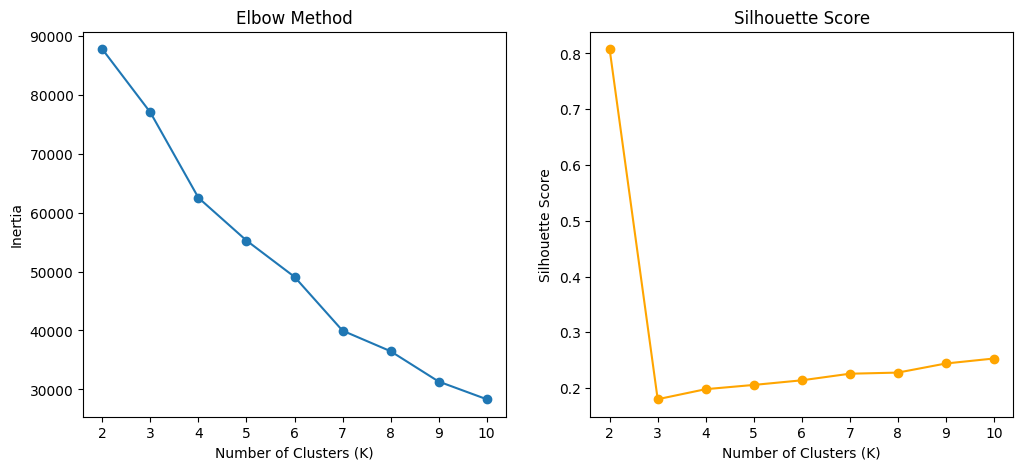

In [9]:
# Determine optimal number of clusters using elbow method and silhouette score
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, clusters))
    print(f"Inertia for k={k}: {kmeans.inertia_}")
    print(f"Silhouette Score for k={k}: {silhouette_score(X_pca, clusters)}")

# Plot Elbow and Silhouette scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


In [10]:
# KMeans clustering with the optimal k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [11]:
df['clusters'] = clusters
cluster_summary = df.groupby('clusters').mean(numeric_only=True)
print("\nCluster Summary (mean values per feature):")
print(cluster_summary)

df.to_csv('clustered_data_unified.csv', index=False)


Cluster Summary (mean values per feature):
              henAge  layingRatePopulateDifference  LayingRate_avg  \
clusters                                                             
0         364.667436                     -2.181725       86.290118   
1         305.133333                    -14.839679       80.235321   
2         307.714068                      0.967878       84.783826   

          totalMortality_avg  inDoorTempMax_avg  inDoorTempMin_avg  \
clusters                                                             
0                   0.003140          29.805842          22.476760   
1                   0.242121          28.802086          18.752583   
2                   0.007300          24.241813          18.674045   

          LayingRate_stdev  totalMortality_stdev  inDoorTempMax_stdev  \
clusters                                                                
0                 9.176145              0.002762             3.728758   
1                 9.064008         

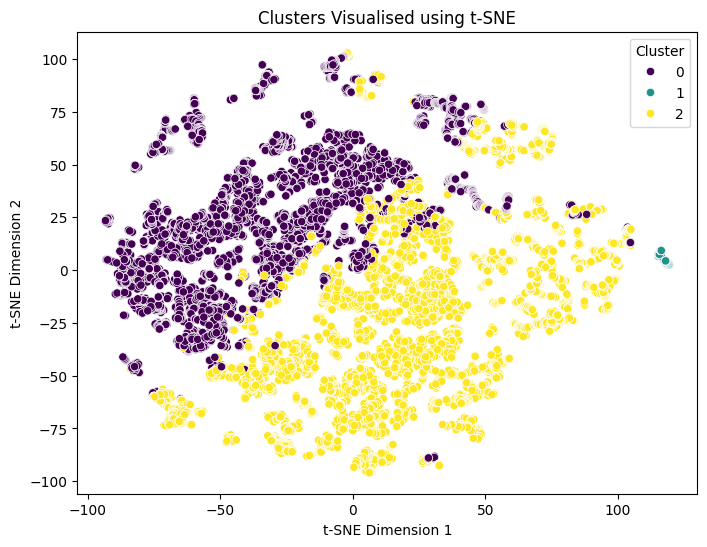

In [12]:
#Apply t-SNE for dimensionality reduction:
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2D for visualisation
X_tsne = tsne.fit_transform(X_pca)  #

#Create a DataFrame for visualisation:
df_vis = pd.DataFrame({'t-SNE Dimension 1': X_tsne[:, 0],
                        't-SNE Dimension 2': X_tsne[:, 1],
                        'Cluster': clusters})

# Visualise clusters using scatter plot:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE Dimension 1', y='t-SNE Dimension 2', hue='Cluster', data=df_vis, palette='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clusters Visualised using t-SNE')
plt.show()

In [13]:
# Calculate Calinski-Harabasz Score
ch_score = calinski_harabasz_score(X_pca, clusters)
print(f"Calinski-Harabasz Score: {ch_score}")



Calinski-Harabasz Score: 2013.068150119339
